In [262]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp
from scipy.stats import gaussian_kde
from tests import load_test
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import scipy.stats as stats

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib notebook
plt.style.use('seaborn')

# PRblur (PSF = rotation)

In [69]:
n = 25
A_obs,b_obs,x_obs = load_test('PRblur',n,PSF='rotation')
b_obs = b_obs.flatten()
x_obs = x_obs.flatten()

Test not found. Attempting MATLAB call.
MATLAB call: [A,b,x,ProbInfo] = PRblur(25,options)
Saving .mat files...
Loading .mat files...


In [70]:
m = 100
A_sur,b_sur,x_sur = load_test('PRblur',m,PSF='rotation')
b_sur = b_sur.flatten()
x_sur = x_sur.flatten()

Test not found. Attempting MATLAB call.
MATLAB call: [A,b,x,ProbInfo] = PRblur(100,options)
Saving .mat files...
Loading .mat files...


In [106]:
sigma = .005
b_noisy = b_obs+sigma*np.max(np.abs(b_obs))*np.random.randn(*b_obs.shape)

<IPython.core.display.Javascript object>


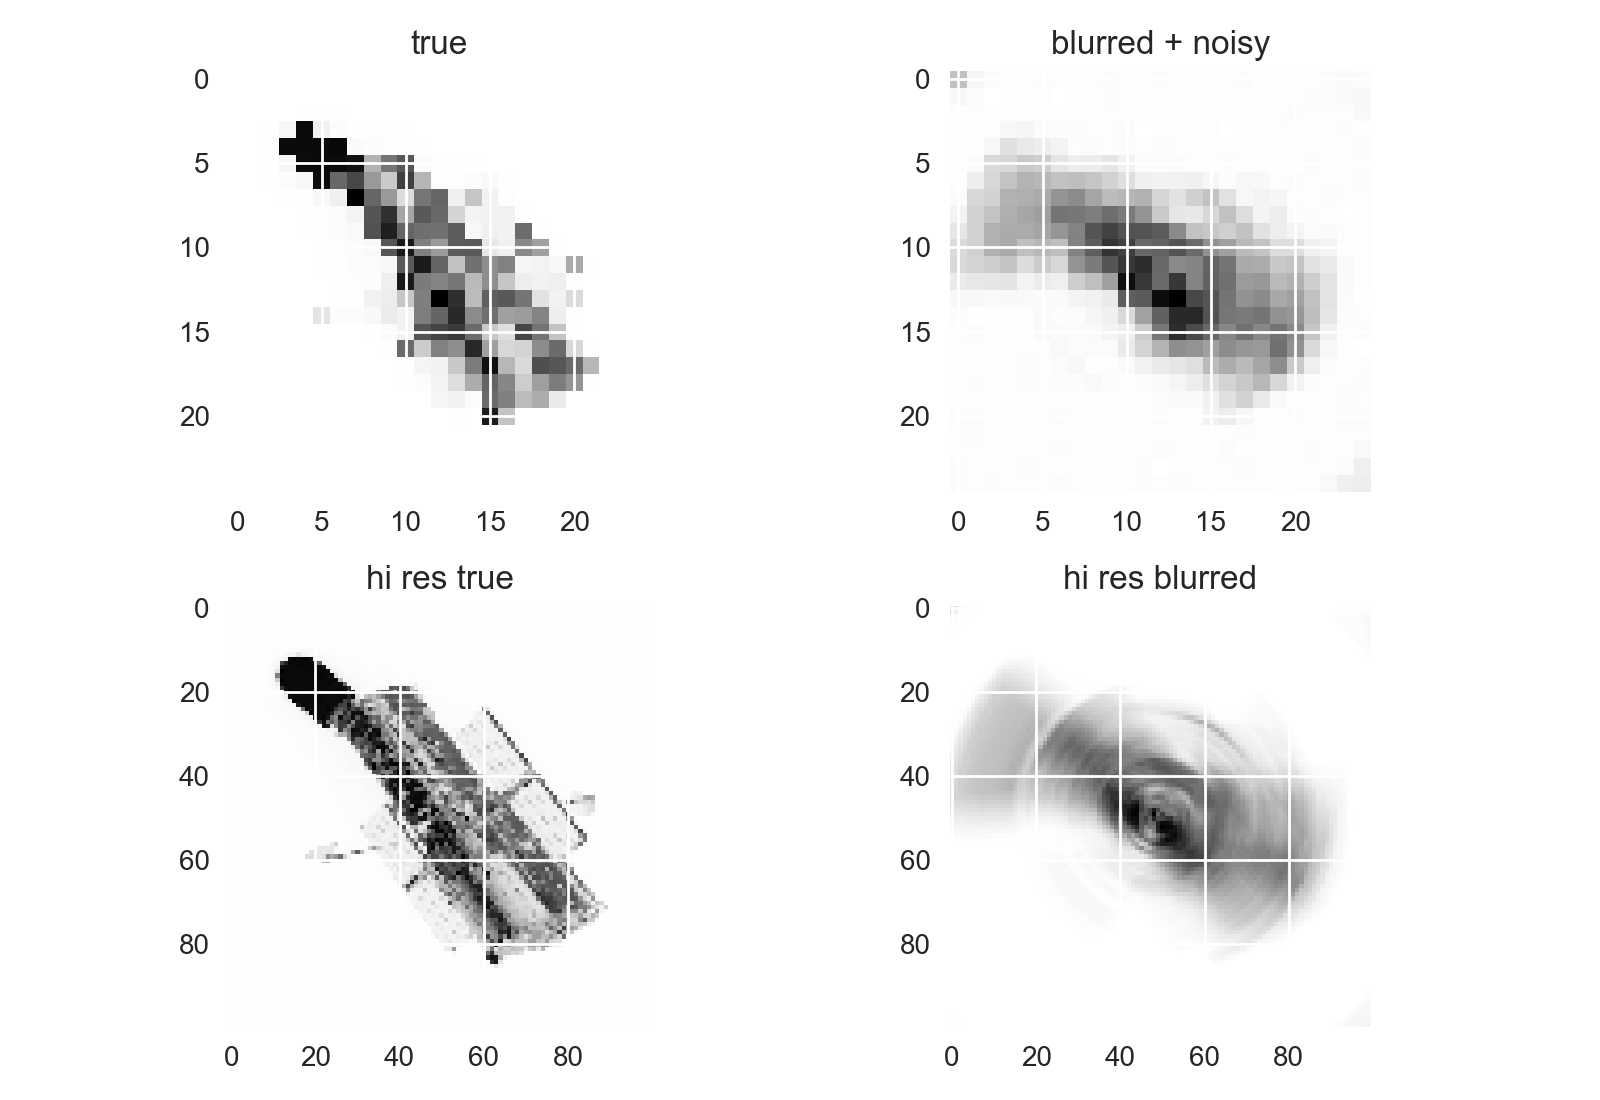

In [107]:
fig = plt.figure()
plt.subplot(221)
plt.imshow(x_obs.reshape(n,n))
plt.title('true')
plt.subplot(222)
plt.imshow(b_noisy.reshape(n,n))
plt.title('blurred + noisy')
plt.subplot(223)
plt.imshow(x_sur.reshape(m,m))
plt.title('hi res true')
plt.subplot(224)
plt.imshow(b_sur.reshape(m,m))
plt.title('hi res blurred')
plt.tight_layout()
plt.show()

In [108]:
x_hat = spla.lsqr(A_obs,b_noisy)

0.22603601349922758


<IPython.core.display.Javascript object>


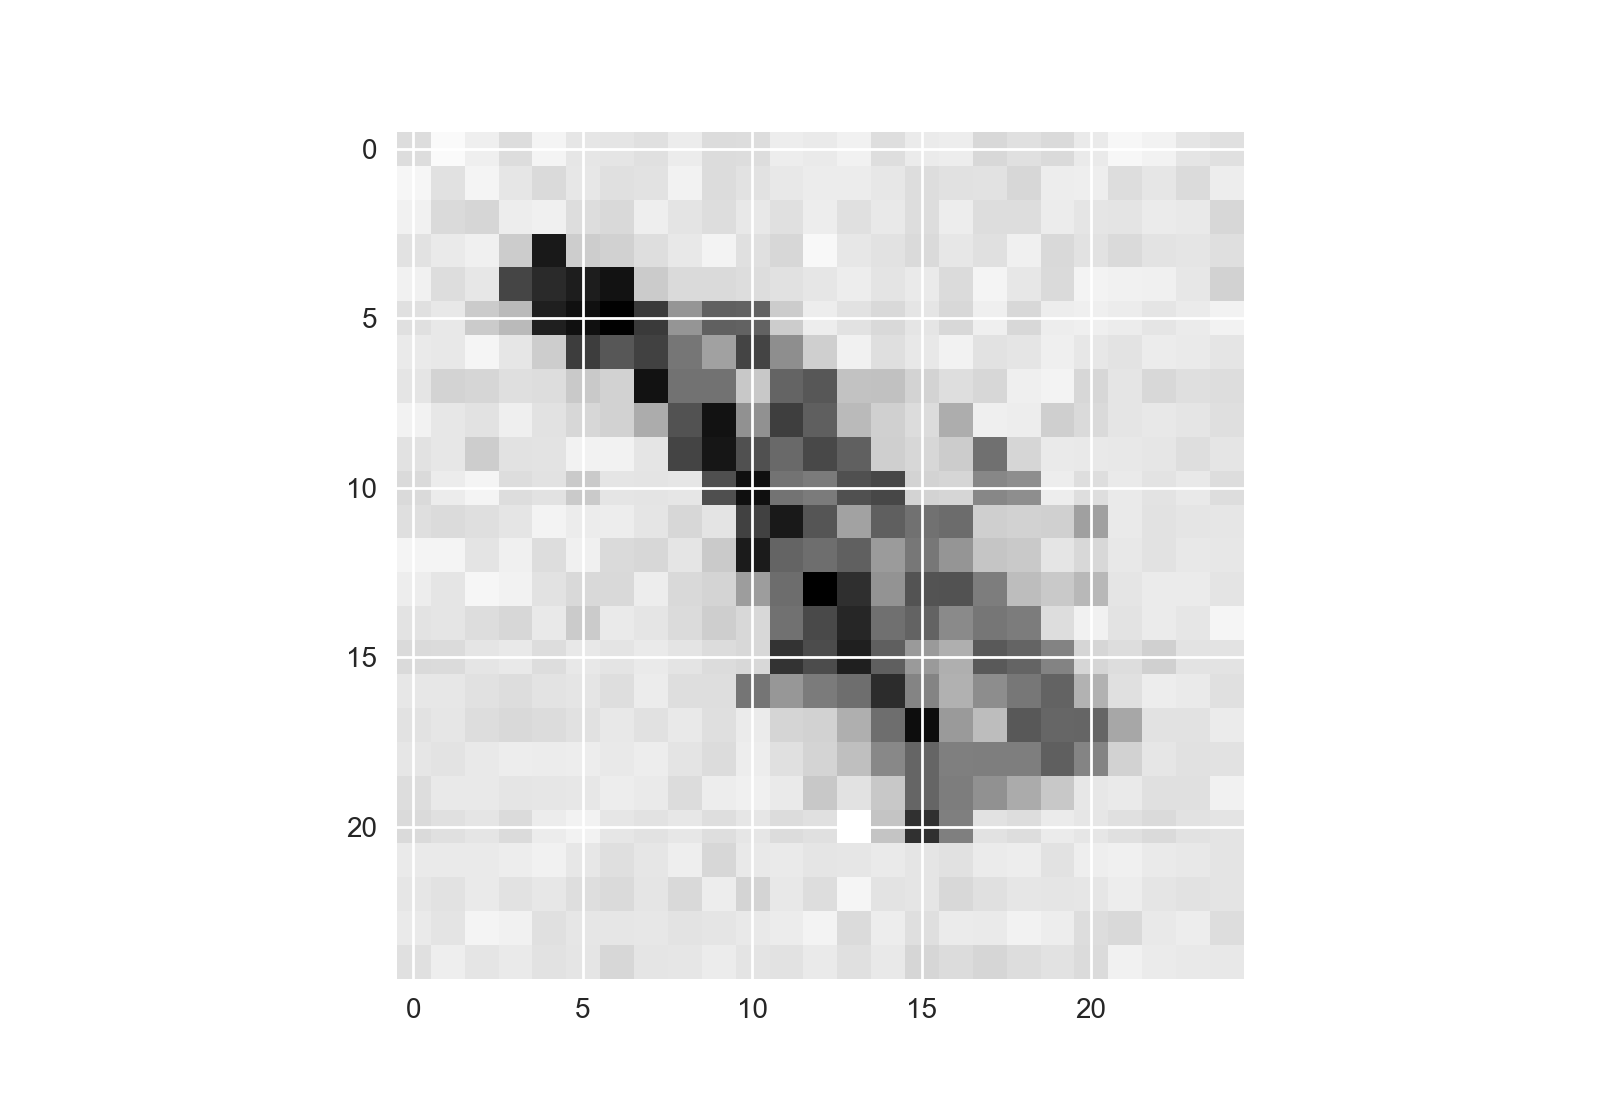

In [140]:
lambda_ = .03
xhat_tik = spla.lsqr(A_obs,b_noisy,damp=lambda_)
print(np.max(np.abs(xhat_tik[0]-x_obs)))
fig = plt.figure()
plt.imshow(xhat_tik[0].reshape(n,n))
plt.show()

<IPython.core.display.Javascript object>


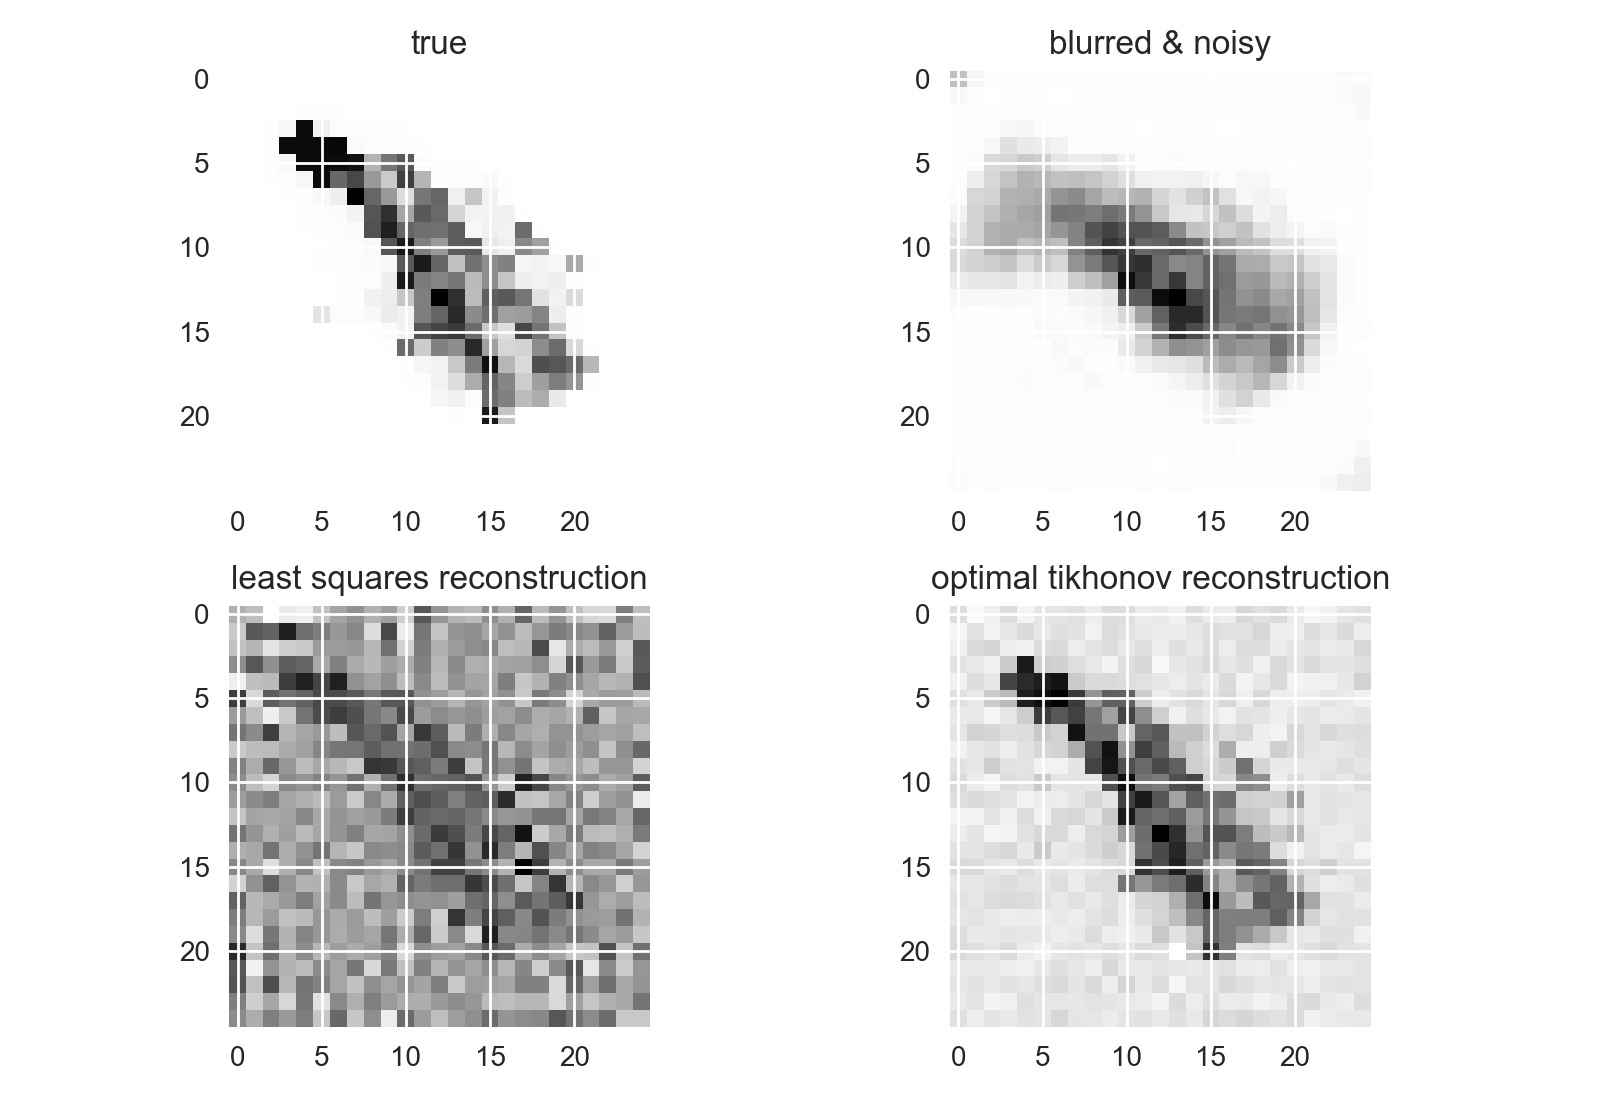

In [142]:
fig = plt.figure()
plt.subplot(221)
plt.imshow(x_obs.reshape(n,n))
plt.title('true')
plt.subplot(222)
plt.imshow(b_noisy.reshape(n,n))
plt.title('blurred & noisy')
plt.subplot(223)
plt.imshow(x_hat[0].reshape(n,n))
plt.title('least squares reconstruction')
plt.subplot(224)
plt.imshow(xhat_tik[0].reshape(n,n))
plt.title('optimal tikhonov reconstruction')
plt.tight_layout()
plt.show()

In [97]:
u = np.linspace(0,1,n)
kernel = gp.kernels.RBF()+gp.kernels.WhiteKernel(noise_level=sigma*np.max(np.abs(b_obs)))
gp1 = gp.GaussianProcessRegressor(kernel)
U,V = np.meshgrid(u,u,indexing='ij')
gp1 = gp1.fit(np.array([U.flatten(),V.flatten()]).T,b_noisy.flatten())

In [98]:
u_sur = np.linspace(0,1,m)
U_sur,V_sur = np.meshgrid(u_sur,u_sur,indexing='ij')

In [99]:
g,cov = gp1.predict(np.array([U_sur.flatten(),V_sur.flatten()]).T,return_cov=True)

In [263]:
sample = g + stats.multivariate_normal(cov=cov)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


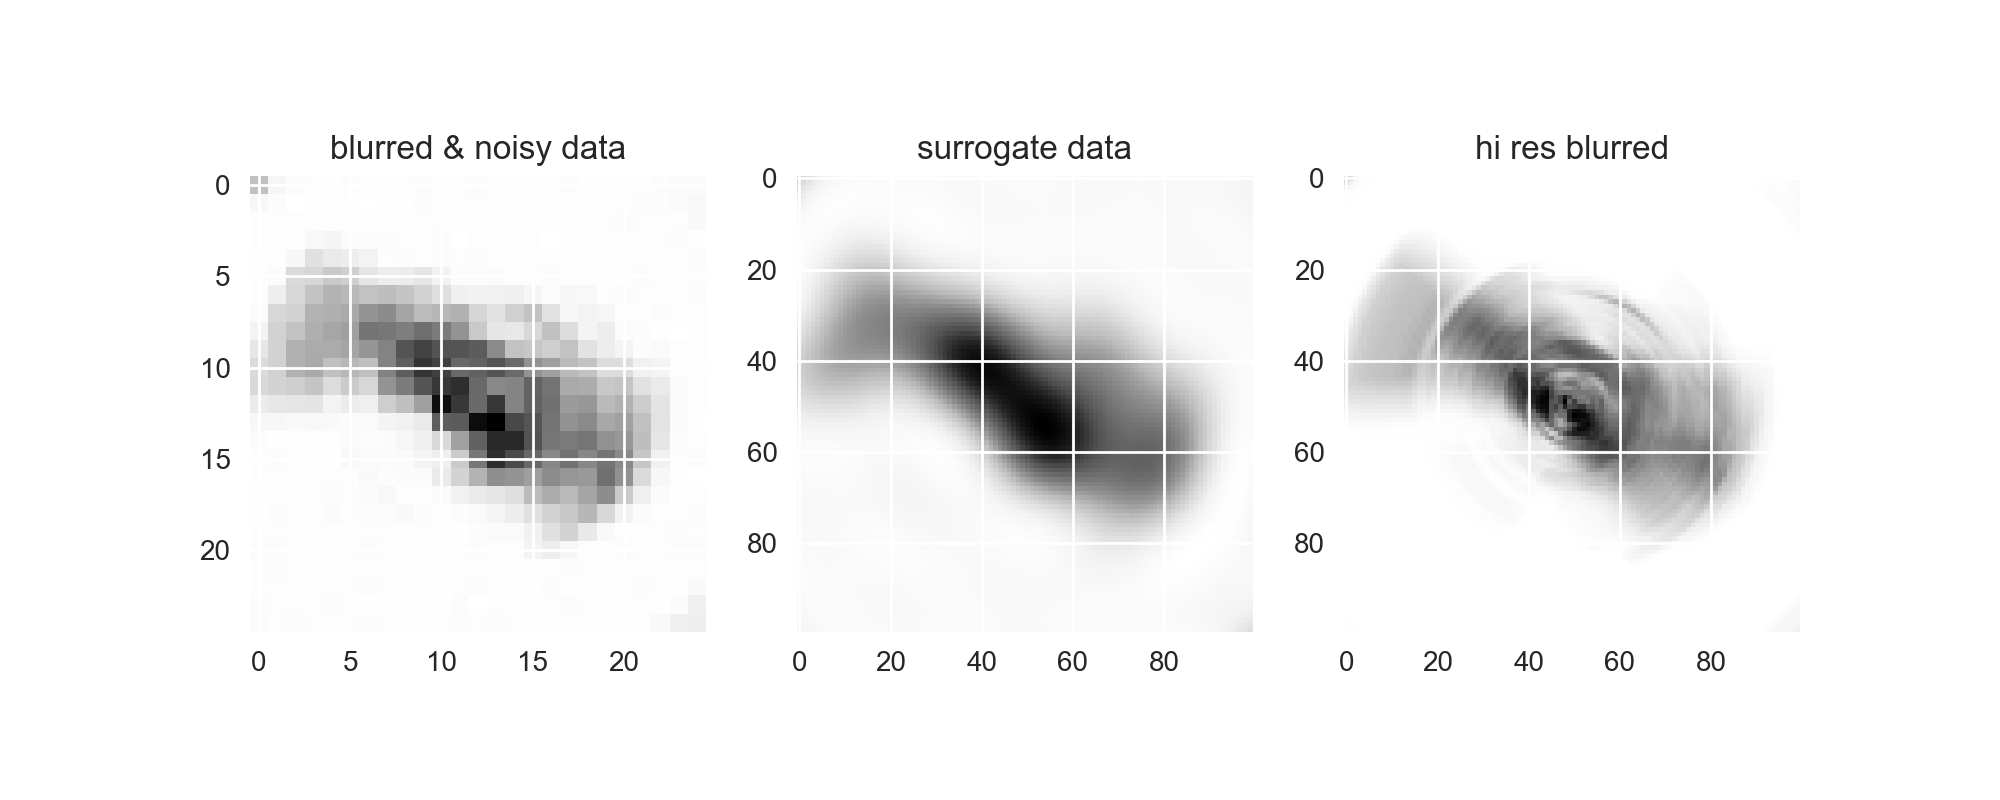

In [147]:
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(b_noisy.reshape(n,n))
plt.title('blurred & noisy data')
plt.subplot(132)
plt.imshow(g.reshape(m,m))
plt.title('surrogate data')
plt.subplot(133)
plt.imshow(b_sur.reshape(m,m))
plt.title('hi res blurred')
plt.show()

In [164]:
B = A_sur.toarray()@la.solve(cov,A_sur.toarray())

In [173]:
y = A_sur.T@la.solve(cov,g)

In [186]:
lambda_ = 1e1
x_gp = la.solve(B+lambda_**2*np.eye(B.shape[0]),y)

<IPython.core.display.Javascript object>


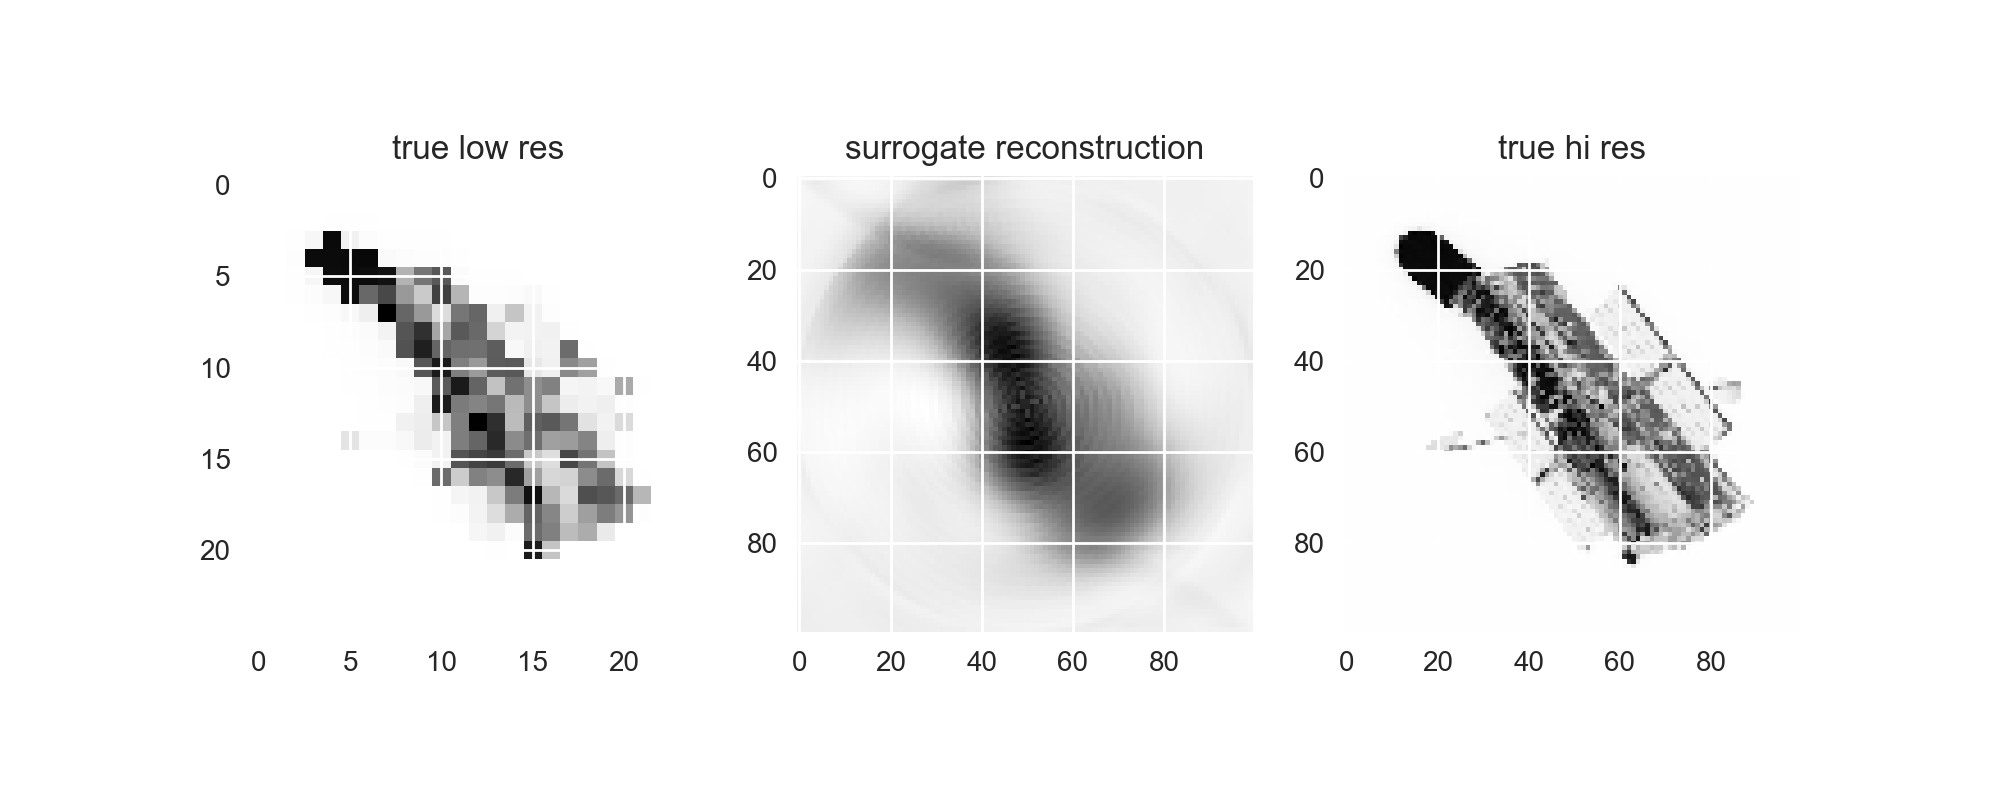

In [187]:
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(x_obs.reshape(n,n))
plt.title('true low res')
plt.subplot(132)
plt.imshow(x_gp.reshape(m,m))
plt.title('surrogate reconstruction')
plt.subplot(133)
plt.imshow(x_sur.reshape(m,m))
plt.title('true hi res')
plt.show()

# PRblur (PSF = gauss)

In [195]:
n = 25
A_obs,b_obs,x_obs = load_test('PRblur',n)
b_obs = b_obs.flatten()
x_obs = x_obs.flatten()

Test found in: tests/PRblur_25/
Loading .mat files...


In [201]:
m = 100
A_sur,b_sur,x_sur = load_test('PRblur',m)
b_sur = b_sur.flatten()
x_sur = x_sur.flatten()

Test not found. Attempting MATLAB call.
MATLAB call: [A,b,x,ProbInfo] = PRblur(100)
Saving .mat files...
checking for psfMatrix objects...
expanding psfMatrix objects...
Loading .mat files...


In [228]:
# sigma = .00005
sigma = 0
b_noisy = b_obs+sigma*np.max(np.abs(b_obs))*np.random.randn(*b_obs.shape)

<IPython.core.display.Javascript object>


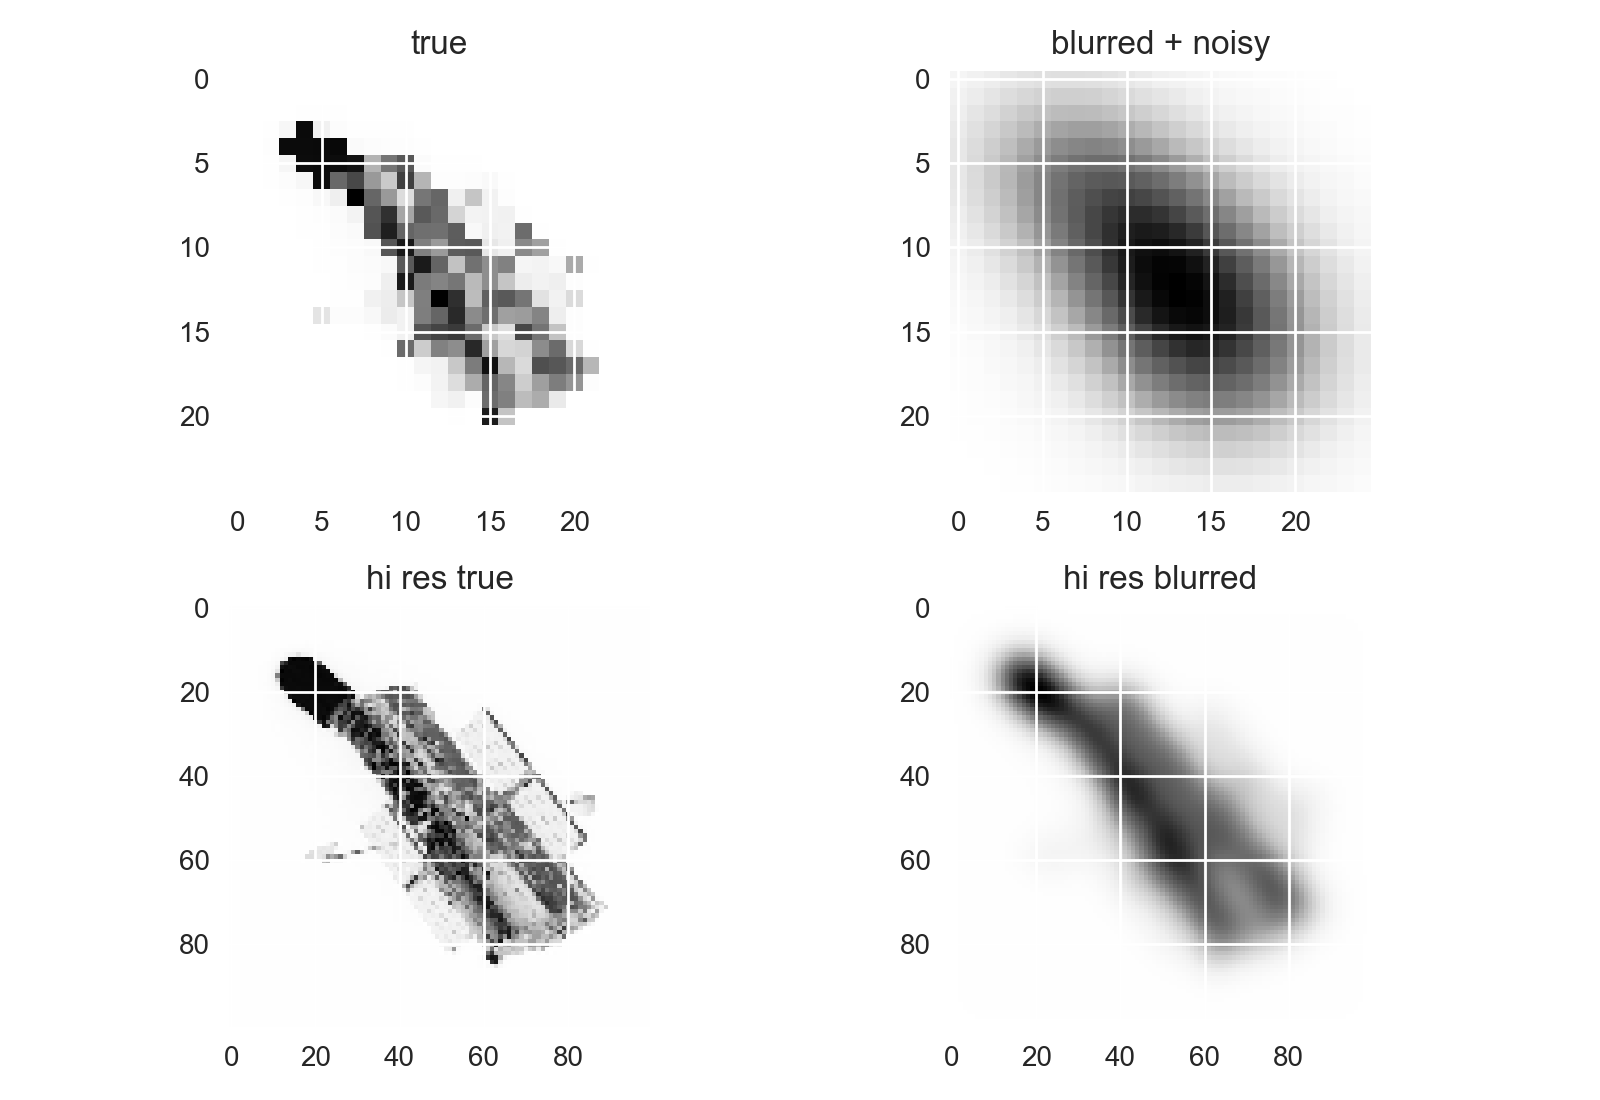

In [229]:
fig = plt.figure()
plt.subplot(221)
plt.imshow(x_obs.reshape(n,n))
plt.title('true')
plt.subplot(222)
plt.imshow(b_noisy.reshape(n,n))
plt.title('blurred + noisy')
plt.subplot(223)
plt.imshow(x_sur.reshape(m,m))
plt.title('hi res true')
plt.subplot(224)
plt.imshow(b_sur.reshape(m,m))
plt.title('hi res blurred')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


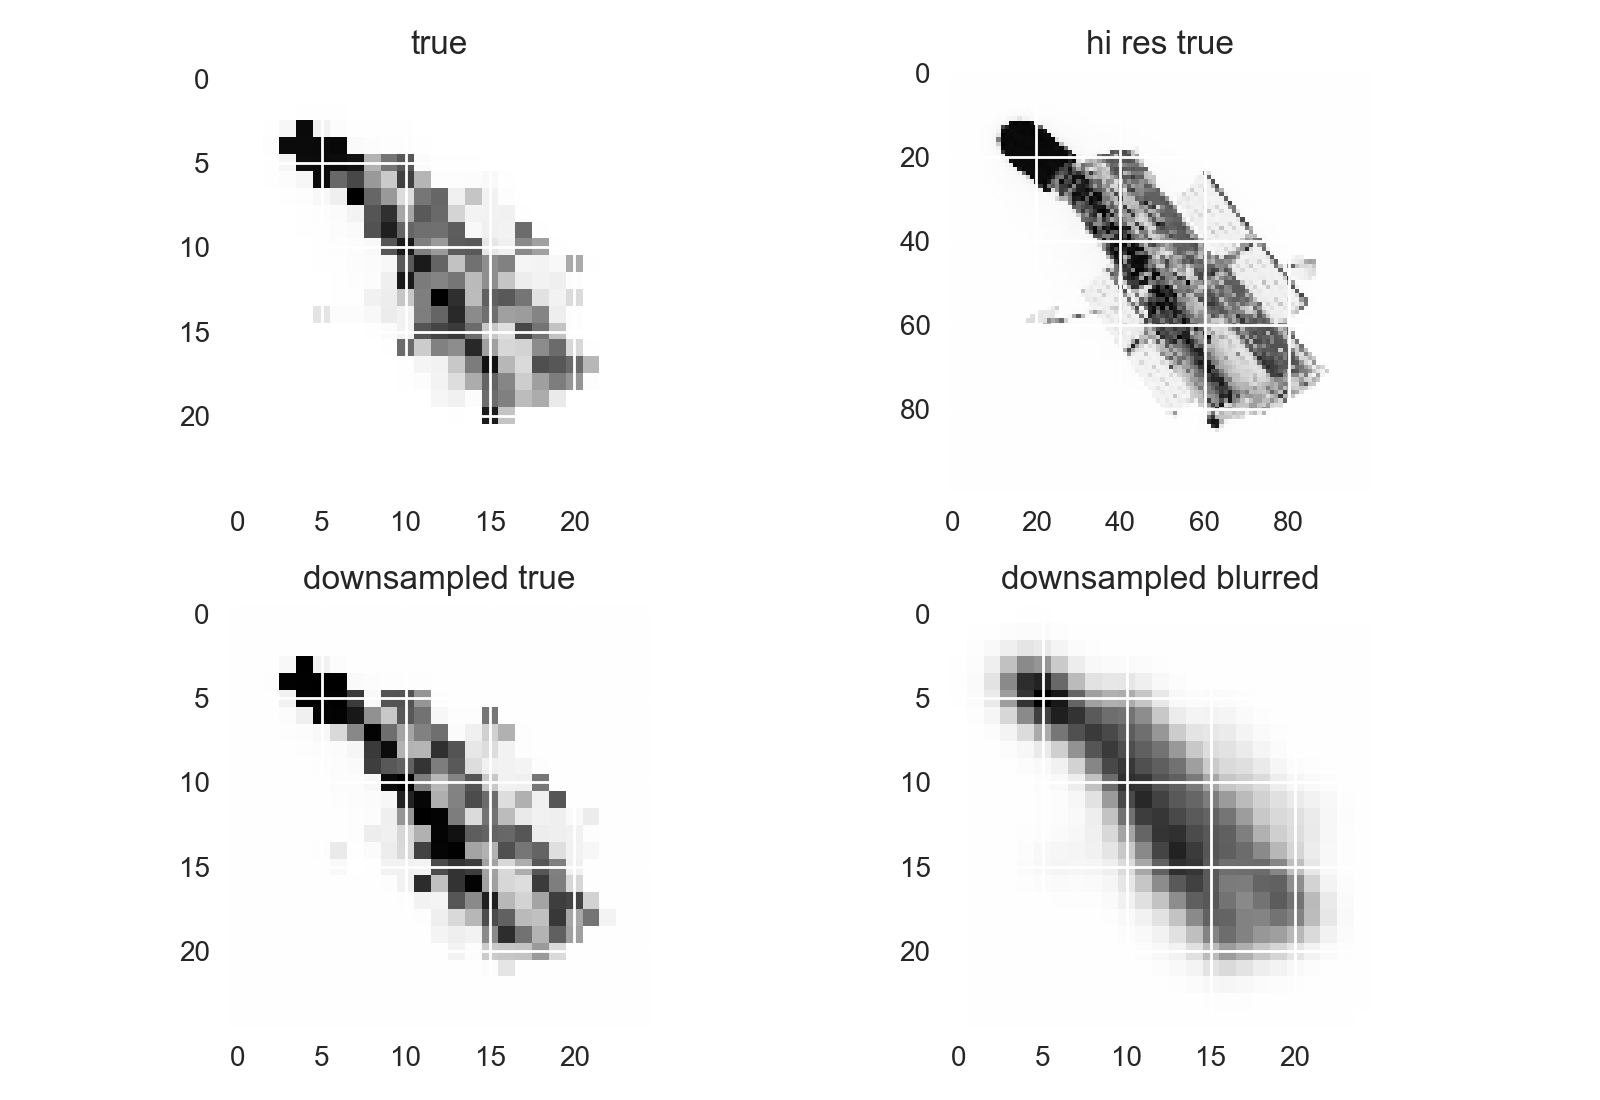

In [247]:
x_down = x_sur.reshape(100,100)[::4,::4].flatten()
b_down = b_sur.reshape(100,100)[::4,::4].flatten()
fig = plt.figure()
plt.subplot(221)
plt.imshow(x_obs.reshape(n,n))
plt.title('true')
plt.subplot(222)
plt.imshow(x_sur.reshape(m,m))
plt.title('hi res true')
plt.subplot(223)
plt.imshow(x_down.reshape(n,n))
plt.title('downsampled true')
plt.subplot(224)
plt.imshow(b_down.reshape(n,n))
plt.title('downsampled blurred')
plt.tight_layout()
plt.show()

In [248]:
x_hat = spla.lsqr(A_obs,b_down)

5.909168071474785


<IPython.core.display.Javascript object>


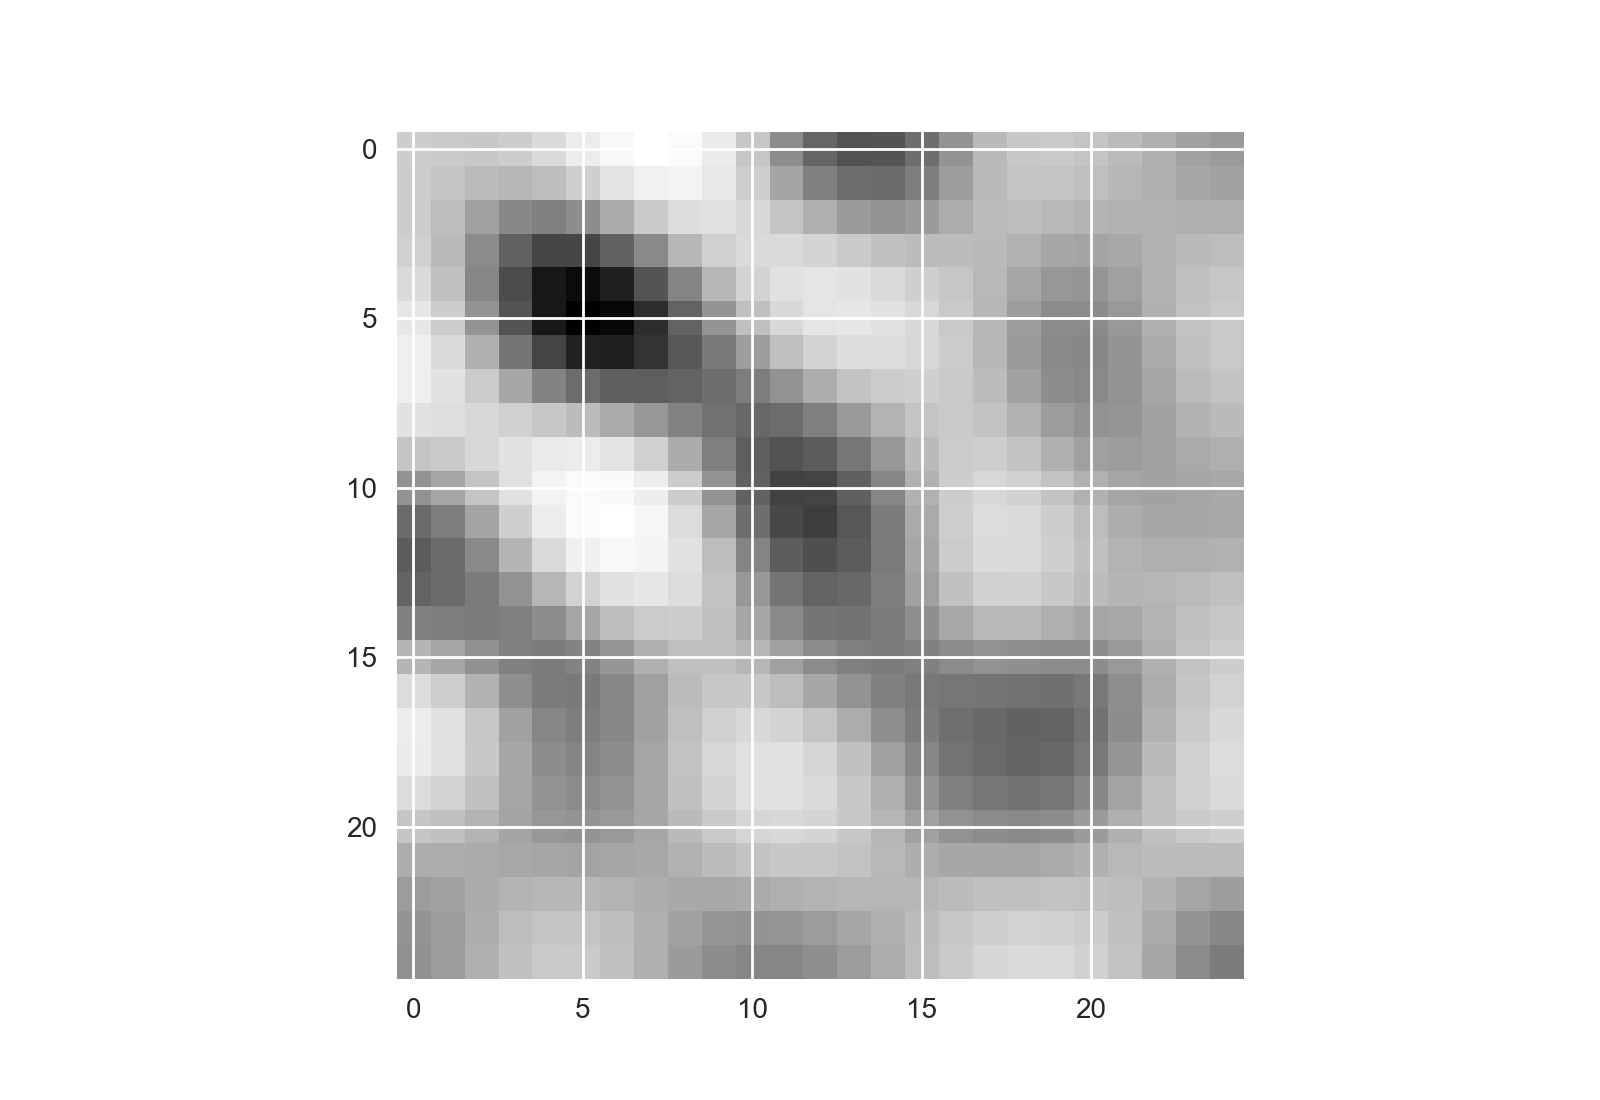

In [249]:
lambda_ = .015
xhat_tik = spla.lsqr(A_obs,b_down,damp=lambda_)
print(np.max(np.abs(xhat_tik[0]-x_obs)))
fig = plt.figure()
plt.imshow(xhat_tik[0].reshape(n,n))
plt.show()

<IPython.core.display.Javascript object>


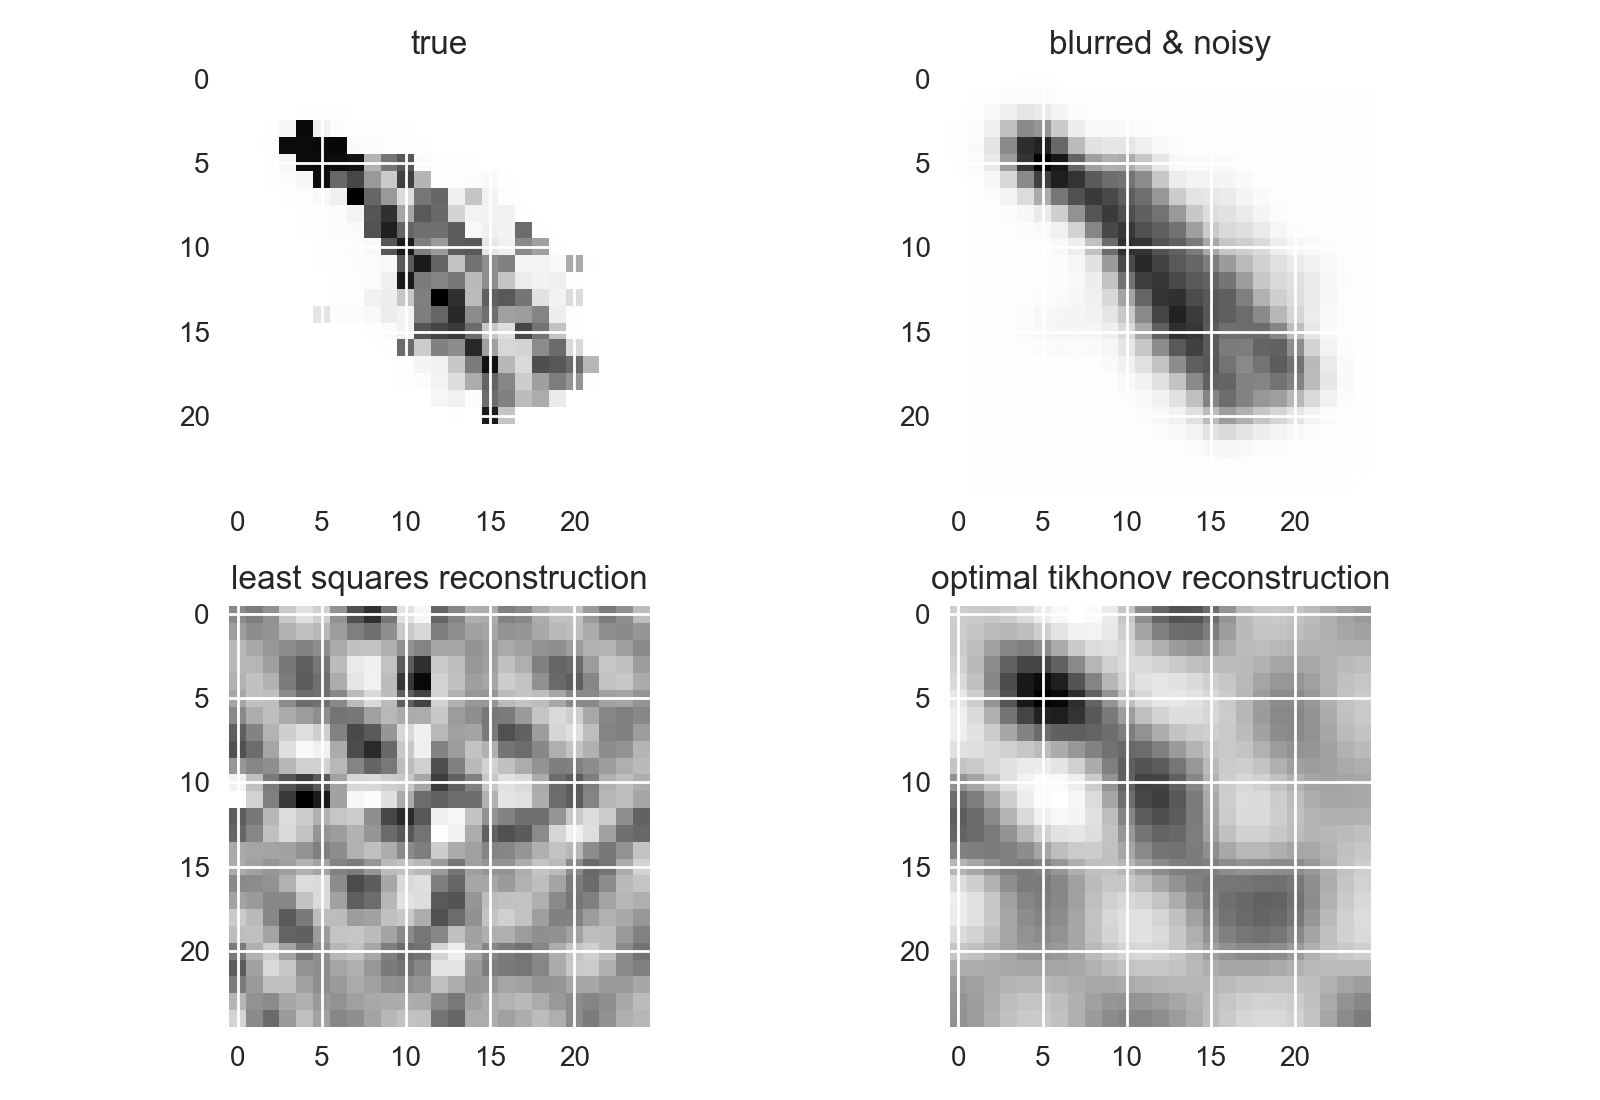

In [250]:
fig = plt.figure()
plt.subplot(221)
plt.imshow(x_obs.reshape(n,n))
plt.title('true')
plt.subplot(222)
plt.imshow(b_down.reshape(n,n))
plt.title('blurred & noisy')
plt.subplot(223)
plt.imshow(x_hat[0].reshape(n,n))
plt.title('least squares reconstruction')
plt.subplot(224)
plt.imshow(xhat_tik[0].reshape(n,n))
plt.title('optimal tikhonov reconstruction')
plt.tight_layout()
plt.show()

In [258]:
u = np.linspace(0,1,n)
kernel = gp.kernels.RBF(length_scale_bounds=(1e-50, 100000.0))
gp1 = gp.GaussianProcessRegressor(kernel)
U,V = np.meshgrid(u,u,indexing='ij')
gp1 = gp1.fit(np.array([U.flatten(),V.flatten()]).T,b_down.flatten())

/Users/hringer/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-50. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


In [259]:
u_sur = np.linspace(0,1,m)
U_sur,V_sur = np.meshgrid(u_sur,u_sur,indexing='ij')

In [260]:
g,cov = gp1.predict(np.array([U_sur.flatten(),V_sur.flatten()]).T,return_cov=True)

<IPython.core.display.Javascript object>


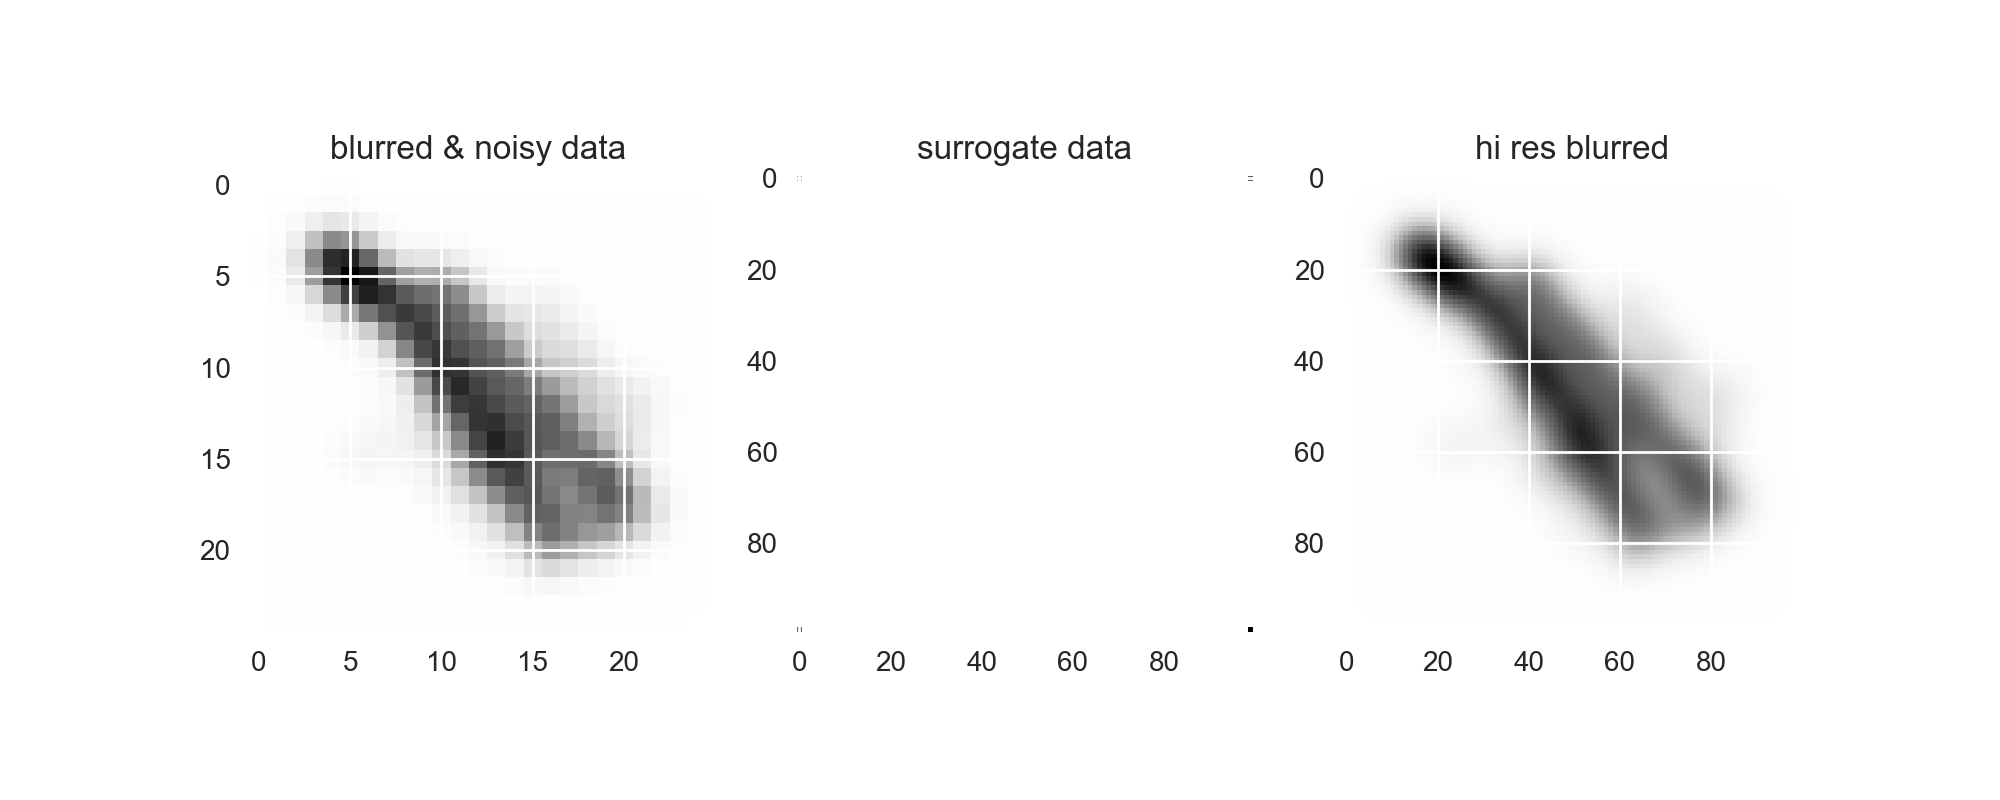

In [261]:
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(b_down.reshape(n,n))
plt.title('blurred & noisy data')
plt.subplot(132)
plt.imshow(g.reshape(m,m))
plt.title('surrogate data')
plt.subplot(133)
plt.imshow(b_sur.reshape(m,m))
plt.title('hi res blurred')
plt.show()

In [164]:
B = A_sur.toarray()@la.solve(cov,A_sur.toarray())

In [173]:
y = A_sur.T@la.solve(cov,g)

In [186]:
lambda_ = 1e1
x_gp = la.solve(B+lambda_**2*np.eye(B.shape[0]),y)

<IPython.core.display.Javascript object>


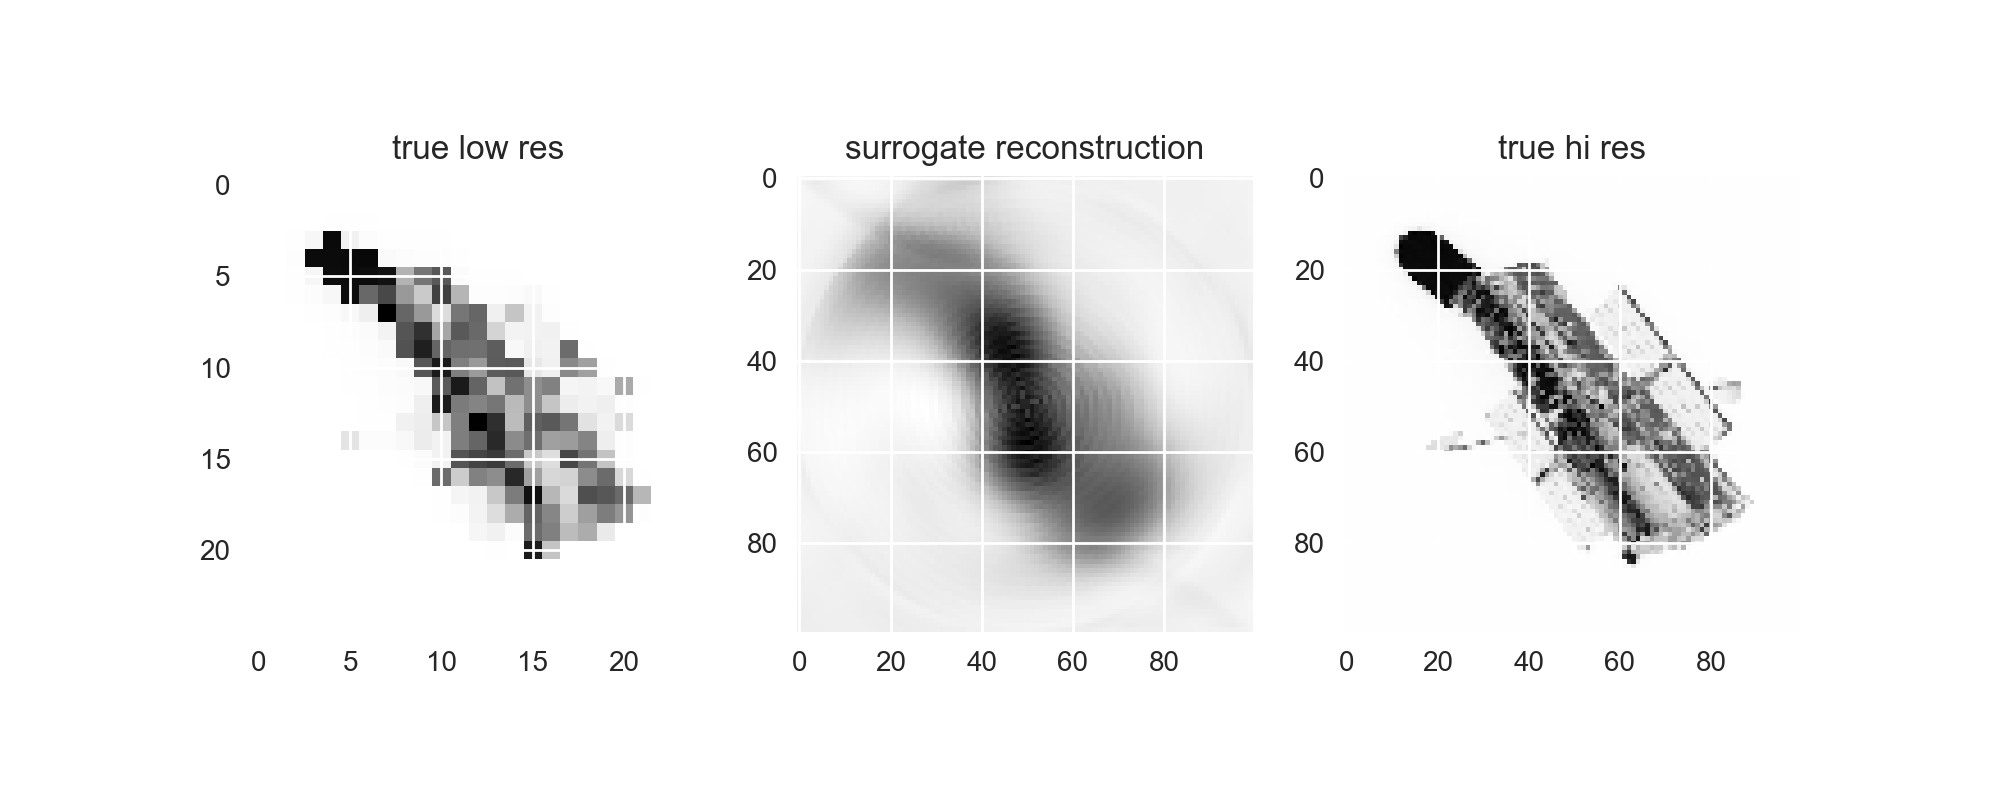

In [187]:
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(x_obs.reshape(n,n))
plt.title('true low res')
plt.subplot(132)
plt.imshow(x_gp.reshape(m,m))
plt.title('surrogate reconstruction')
plt.subplot(133)
plt.imshow(x_sur.reshape(m,m))
plt.title('true hi res')
plt.show()

In [255]:
gp.kernels.RBF?

In [265]:
stats.multivariate_normal.rvs(cov=cov)

KeyboardInterrupt: 